In [10]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

#regression imports 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

#model selection
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

# evaluation metrics
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error, make_scorer
#model selection
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV


In [11]:
train_features = pd.read_csv('dengue_features_train.csv')

train_labels = pd.read_csv('dengue_labels_train.csv')

#Column(s) to use as the row labels of the DataFrame,either given as string
#name or column index. If a sequence of int / str is given, a MultiIndex is used.


## Missing Value Imputation

In [70]:
pd.isnull(train_features).sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

# removing the rows having more than 10 NaNs


In [12]:
train_features = train_features.dropna(thresh=10)

In [72]:
train_features.shape

(1446, 24)

# Method of imputation 
Mean - before after -> upper value 

In [13]:
i = pd.isnull(train_features.ndvi_ne).sum()
while i != 0:
    train_features.ndvi_ne = train_features.ndvi_ne.fillna((train_features.ndvi_ne.shift() + train_features.ndvi_ne.shift(-1))/2)

    train_features.ndvi_ne = train_features.ndvi_ne.fillna((train_features.ndvi_ne.shift()))

    i = pd.isnull(train_features.ndvi_ne).sum()

j = pd.isnull(train_features.ndvi_nw).sum()
while j != 0:
    train_features.ndvi_nw = train_features.ndvi_nw.fillna((train_features.ndvi_nw.shift() + train_features.ndvi_nw.shift(-1))/2)

    train_features.ndvi_nw = train_features.ndvi_nw.fillna((train_features.ndvi_nw.shift()))

    j = pd.isnull(train_features.ndvi_nw).sum() 
    
k = pd.isnull(train_features.ndvi_sw).sum()
while k != 0:
    train_features.ndvi_sw = train_features.ndvi_sw.fillna((train_features.ndvi_sw.shift() + train_features.ndvi_sw.shift(-1))/2)

    train_features.ndvi_sw = train_features.ndvi_sw.fillna((train_features.ndvi_sw.shift()))

    k = pd.isnull(train_features.ndvi_sw).sum() 

l = pd.isnull(train_features.ndvi_se).sum()
while l != 0:
    train_features.ndvi_se = train_features.ndvi_se.fillna((train_features.ndvi_se.shift() + train_features.ndvi_se.shift(-1))/2)

    train_features.ndvi_se = train_features.ndvi_se.fillna((train_features.ndvi_se.shift()))

    l = pd.isnull(train_features.ndvi_se).sum() 
    
m = pd.isnull(train_features.precipitation_amt_mm).sum()
while m != 0:
    train_features.precipitation_amt_mm = train_features.precipitation_amt_mm.fillna((train_features.precipitation_amt_mm.shift() + train_features.precipitation_amt_mm.shift(-1))/2)

    train_features.precipitation_amt_mm = train_features.precipitation_amt_mm.fillna((train_features.precipitation_amt_mm.shift()))

    m = pd.isnull(train_features.precipitation_amt_mm).sum() 
    
n = pd.isnull(train_features.reanalysis_sat_precip_amt_mm).sum()
while n != 0:
    train_features.reanalysis_sat_precip_amt_mm = train_features.reanalysis_sat_precip_amt_mm.fillna((train_features.reanalysis_sat_precip_amt_mm.shift() + train_features.reanalysis_sat_precip_amt_mm.shift(-1))/2)

    train_features.reanalysis_sat_precip_amt_mm = train_features.reanalysis_sat_precip_amt_mm.fillna((train_features.reanalysis_sat_precip_amt_mm.shift()))

    n = pd.isnull(train_features.reanalysis_sat_precip_amt_mm).sum() 
    

In [14]:
o = pd.isnull(train_features.station_avg_temp_c).sum()
while o != 0:
    train_features.station_avg_temp_c = train_features.station_avg_temp_c.fillna((train_features.station_avg_temp_c.shift() + train_features.station_avg_temp_c.shift(-1))/2)

    train_features.station_avg_temp_c = train_features.station_avg_temp_c.fillna((train_features.station_avg_temp_c.shift()))

    o = pd.isnull(train_features.station_avg_temp_c).sum()

p = pd.isnull(train_features.station_diur_temp_rng_c).sum()
while p != 0:
    train_features.station_diur_temp_rng_c = train_features.station_diur_temp_rng_c.fillna((train_features.station_diur_temp_rng_c.shift() + train_features.station_diur_temp_rng_c.shift(-1))/2)

    train_features.station_diur_temp_rng_c = train_features.station_diur_temp_rng_c.fillna((train_features.station_diur_temp_rng_c.shift()))

    p = pd.isnull(train_features.station_diur_temp_rng_c).sum() 

q = pd.isnull(train_features.station_max_temp_c).sum()
while q != 0:
    train_features.station_max_temp_c = train_features.station_max_temp_c.fillna((train_features.station_max_temp_c.shift() + train_features.station_max_temp_c.shift(-1))/2)

    train_features.station_max_temp_c = train_features.station_max_temp_c.fillna((train_features.station_max_temp_c.shift()))

    q = pd.isnull(train_features.station_max_temp_c).sum() 

r = pd.isnull(train_features.station_min_temp_c).sum()
while r != 0:
    train_features.station_min_temp_c = train_features.station_min_temp_c.fillna((train_features.station_min_temp_c.shift() + train_features.station_min_temp_c.shift(-1))/2)

    train_features.station_min_temp_c = train_features.station_min_temp_c.fillna((train_features.station_min_temp_c.shift()))

    r = pd.isnull(train_features.station_min_temp_c).sum() 

s = pd.isnull(train_features.station_precip_mm).sum()
while s != 0:
    train_features.station_precip_mm = train_features.station_precip_mm.fillna((train_features.station_precip_mm.shift() + train_features.station_precip_mm.shift(-1))/2)

    train_features.station_precip_mm = train_features.station_precip_mm.fillna((train_features.station_precip_mm.shift()))

    s = pd.isnull(train_features.station_precip_mm).sum() 


# the above lines should have been done by a function, but I could not find a working finction for the same :p

In [15]:
pd.isnull(train_features).sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [89]:
train_labels

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
5,sj,1990,23,2
6,sj,1990,24,4
7,sj,1990,25,5
8,sj,1990,26,10
9,sj,1990,27,6


# Seperating data for SJ and IQ

In [19]:
# Seperate data for San Juan
sj_train_features = train_features[train_features['city'] == 'sj']
sj_train_features = sj_train_features.drop(columns =['city','year'])

sj_train_labels = train_labels[train_labels['city'] == 'sj']
sj_train_labels = sj_train_labels.drop(columns =['city'])


# # Separate data for Iquitos
iq_train_features = train_features[train_features['city'] == 'iq']
iq_train_features = iq_train_features.drop(columns =['city','year'])

iq_train_labels = train_labels[train_labels['city'] == 'iq']
iq_train_labels = iq_train_labels.drop(columns =['city'])

In [112]:
iq_train_features.shape

(516, 22)

In [113]:
print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

San Juan
features:  (930, 22)
labels  :  (936, 3)

Iquitos
features:  (516, 22)
labels  :  (520, 3)


# Heatmap and Correlation analysis

In [114]:
sj_train_features

,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,18,4/30/1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,19,5/7/1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,20,5/14/1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,21,5/21/1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,22,5/28/1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,23,6/4/1990,0.154550,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,24,6/11/1990,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,...,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,25,6/18/1990,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,...,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,26,6/25/1990,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,...,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,27,7/2/1990,0.147663,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,...,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


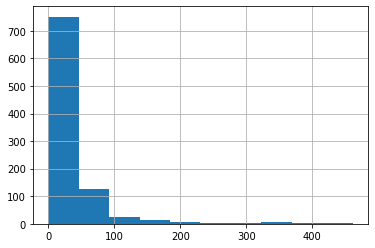

In [126]:
sj_train_labels['total_cases'].hist()


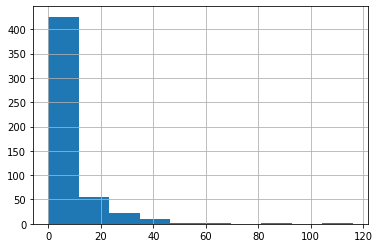

In [127]:
iq_train_labels['total_cases'].hist()

Text(0.5, 1, 'San Juan Variable Correlations')

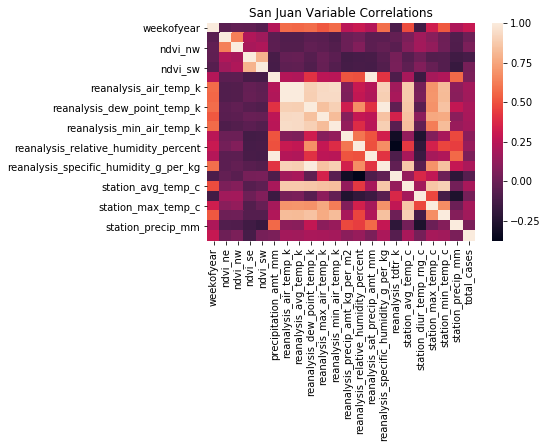

In [20]:
sj_train_features['total_cases'] = sj_train_labels.total_cases
# compute the correlations

sj_correlations = sj_train_features.corr()
# plot san juan
sj_corr_heat = sns.heatmap(sj_correlations)
plt.title('San Juan Variable Correlations')

Text(0.5, 1, 'Iquitos Variable Correlations')

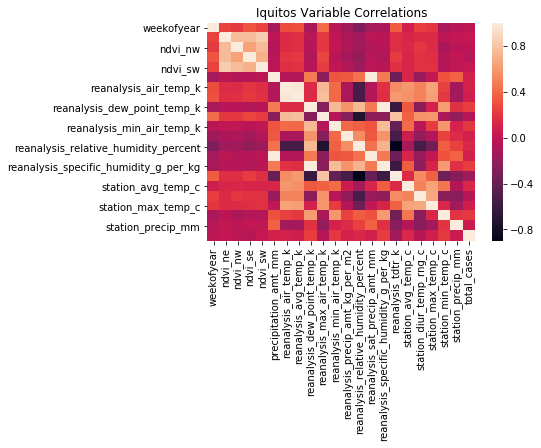

In [21]:
iq_train_features['total_cases'] = iq_train_labels.total_cases
# compute the correlations

iq_correlations = iq_train_features.corr()
# plot san juan
iq_corr_heat = sns.heatmap(iq_correlations)
plt.title('Iquitos Variable Correlations')

Many of the temperature data are strongly correlated, which is expected. But the total_cases 
variable doesn't have many obvious strong correlations.
Interestingly, total_cases seems to only have weak correlations with other variables. Many of 
the climate variables are much more strongly correlated. Interestingly, the vegetation index 
also only has weak correlation with other variables. These correlations may give us some hints 
as to how to improve our model 
that we'll talk about later in this post. For now, let's take a sorted look at total_cases correlations.

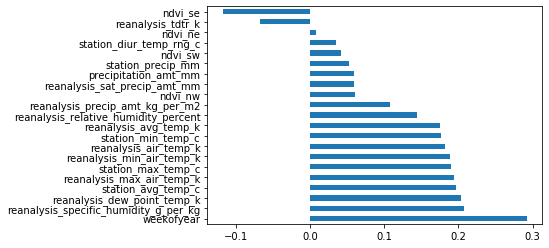

In [22]:
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

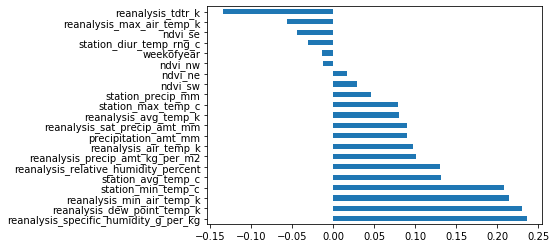

In [23]:
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

A few observations
The wetter the better
The correlation strengths differ for each city, but it looks 
like reanalysis_specific_humidity_g_per_kg and reanalysis_dew_point_temp_k 
are the most strongly correlated with total_cases. This makes sense: we know 
    mosquitos thrive wet climates, the wetter the better!
Hot and heavy
As we all know, "cold and humid" is not a thing. So it's not surprising that as minimum 
temperatures, maximum temperatures, and average temperatures rise, the total_cases of dengue fever tend to rise as well.
Sometimes it rains, so what
Interestingly, the precipitation measurements bear little to no correlation to total_cases,
despite strong correlations to the humidity measurements, as evident by the heatmaps above.
This is just a first pass
Precisely none of these correlations are very strong. Of course, that doesn't mean that some 
feature engineering wizardry can't put us in a better place (standing_water estimate, anyone?). 
Also, it's always useful to keep in mind that life isn't linear, but out-of-the-box correlation 
measurement is – or at least, it measures linear dependence.

Nevertheless, for this benchmark we'll focus on the linear wetness trend we see above, and reduce our inputs to

A few good variables
reanalysis_specific_humidity_g_per_kg
reanalysis_dew_point_temp_k
station_avg_temp_c
station_min_temp_c

In [24]:
#SPlit in training and testing


sj_train_subtrain = sj_train_features.head(800)
sj_train_subtest = sj_train_features.tail(sj_train_features.shape[0] - 800)

iq_train_subtrain = iq_train_features.head(400)
iq_train_subtest = iq_train_features.tail(iq_train_features.shape[0] - 400)

In [25]:
sj_train_features.head()

,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,18,4/30/1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,19,5/7/1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,20,5/14/1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,21,5/21/1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,22,5/28/1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


# Modelling 

        # For SJ

In [184]:
drop_features_sj = [ 'total_cases','weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw','ndvi_se', 'ndvi_sw',
                 'precipitation_amt_mm',
                  'station_avg_temp_c', 
                 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_precip_mm']

#Split in training and testing

sj_train_subtrain = sj_train_features.head(800)
sj_train_subtest = sj_train_features.tail(sj_train_features.shape[0] - 800)

y_train =np.log(sj_train_subtrain['total_cases']+1)
y_test = np.log(sj_train_subtest['total_cases']+1)

X_train =sj_train_subtrain.drop(drop_features, axis = 1)
X_test =sj_train_subtest.drop(drop_features, axis = 1)


regressor_sj = Ridge(alpha=10000) 
regressor_sj.fit(X_train, y_train) #training the algorithm


y_pred = np.exp(regressor_sj.predict(X_test))


In [185]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 18.093736987729375
Mean Squared Error: 338.34819525842295
Root Mean Squared Error: 18.394243535911524


In [103]:
# for IQ

In [190]:
drop_features_iq = [ 'total_cases','weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw','ndvi_se', 'ndvi_sw',
                 'precipitation_amt_mm',
                  'station_avg_temp_c', 
                 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_precip_mm']

#Split in training and testing

iq_train_subtrain = iq_train_features.head(800)
iq_train_subtest = iq_train_features.tail(sj_train_features.shape[0] - 800)

y_train =np.log(iq_train_subtrain['total_cases']+1)
y_test = np.log(iq_train_subtest['total_cases']+1)

X_train =iq_train_subtrain.drop(drop_features, axis = 1)
X_test =iq_train_subtest.drop(drop_features, axis = 1)


regressor_iq = Ridge(alpha=10000)  
regressor_iq.fit(X_train, y_train) #training the algorithm


y_pred = np.exp(regressor_iq.predict(X_test))


In [191]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.5040432829135257
Mean Squared Error: 13.601006409709253
Root Mean Squared Error: 3.687954230967252


# Exporting model  results data

In [192]:
test = pd.read_csv('dengue_features_test.csv')

In [193]:
#same as above, except for total_cases and add city and year to the list 
drop1 = ['city','year','weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw','ndvi_se', 'ndvi_sw',
                 'precipitation_amt_mm',
                  'station_avg_temp_c', 
                 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_precip_mm']

sj_test = test[test['city'] == 'sj']
sj_test =sj_test.drop(drop1, axis = 1)

#same as above, except for total_cases and add city and year to the list 
drop2 = ['city','year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw','ndvi_se', 'ndvi_sw',
                 'precipitation_amt_mm',
                  'station_avg_temp_c', 
                 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_precip_mm']
iq_test = test[test['city'] == 'iq']
iq_test =iq_test.drop(drop2, axis = 1)

In [195]:
sj_test = sj_test.fillna(sj_test.mean())
sj_predictions = np.exp(regressor_sj.predict(sj_test))

iq_test = iq_test.fillna(iq_test.mean())
iq_predictions = np.exp(regressor_iq.predict(iq_test))

sj_predictions = sj_predictions.astype(int)-1
iq_predictions = iq_predictions.astype(int)-1
                        
submission = pd.read_csv("submission_format.csv",
                         index_col=[0, 1, 2])

submission.total_cases = np.concatenate([sj_predictions, iq_predictions])
submission.to_csv("Ridge.csv")